<a href="https://colab.research.google.com/github/respinar1/GoogleColaboratory/blob/main/Wage_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metadata

In [69]:
import sqlite3
import seaborn as sns
import kaggle
from zipfile import ZipFile
import pandas as pd
import numpy as np
print('Done!')

Done!


Code needed to run kaggle API

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
print('Done!')

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Done!


Download the dataset using the Kaggle API

In [3]:
!kaggle datasets download -d ljanjughazyan/wages
print('Done!')

wages.zip: Skipping, found more recently modified local copy (use --force to force download)
Done!


Unzip and extract the contents of the Wage file

In [4]:
wage_file = "wages.zip"
  
# opening the zip file in READ mode
with ZipFile(wage_file, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
wages.csv                                      2019-09-25 07:36:26        62250
Extracting all the files now...
Done!


# Data Manipulation and Visualization

Load csv to Pandas DataFrame

In [5]:
dataset = pd.read_csv('wages.csv')
dataset

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


SQLite Connection

In [6]:
conn = sqlite3.connect('Wages_db.db')

Pass Pandas DataFrame to SQL Database

In [13]:
dataset.to_sql('wages_table', conn, if_exists='replace', index=False)

In [14]:
pd.read_sql('SELECT * FROM wages_table', conn)

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


Highest earning based on race

In [83]:
pay_by_race = pd.read_sql('SELECT race, MAX(ROUND(earn, 2)) as earn FROM wages_table GROUP BY race ORDER BY earn DESC', conn)
pay_by_race

,race,earn
0,white,317949.13
1,other,175901.45
2,black,96404.24
3,hispanic,87392.66


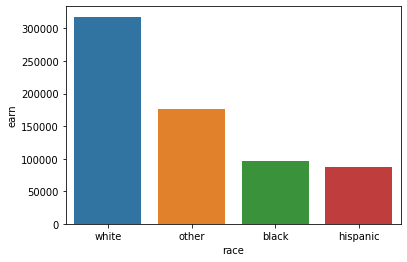

In [100]:
sns.barplot(data=pay_by_race, x='race', y='earn')

Highest earning based on sex

In [22]:
pay_by_sex = pd.read_sql('SELECT sex, MAX(ROUND(earn, 2)) as earn FROM wages_table GROUP BY sex', conn)
pay_by_sex

,sex,earn
0,female,196568.59
1,male,317949.13


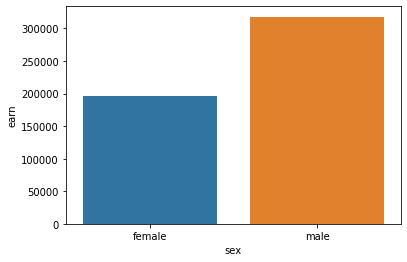

In [98]:
sns.barplot(data=pay_by_sex, x='sex', y='earn')

Correlation between Education and Earning

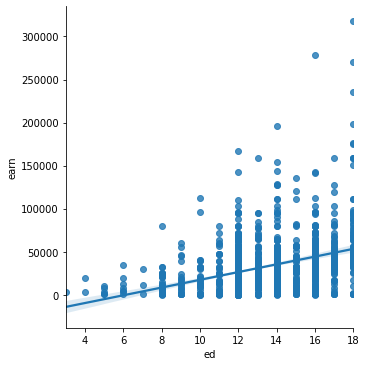

In [109]:
ed_v_earn = pd.read_sql('SELECT ed, earn FROM wages_table', conn)
sns.lmplot(data=ed_v_earn, x='ed', y='earn')

Correlation between Education and Earnings based on Race

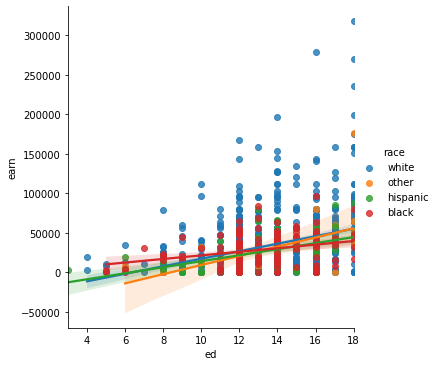

In [164]:
corr_ed_and_race = pd.read_sql('SELECT ed, earn, race FROM wages_table', conn)
sns.lmplot(data=corr_ed_and_race, x='ed', y='earn', hue='race')

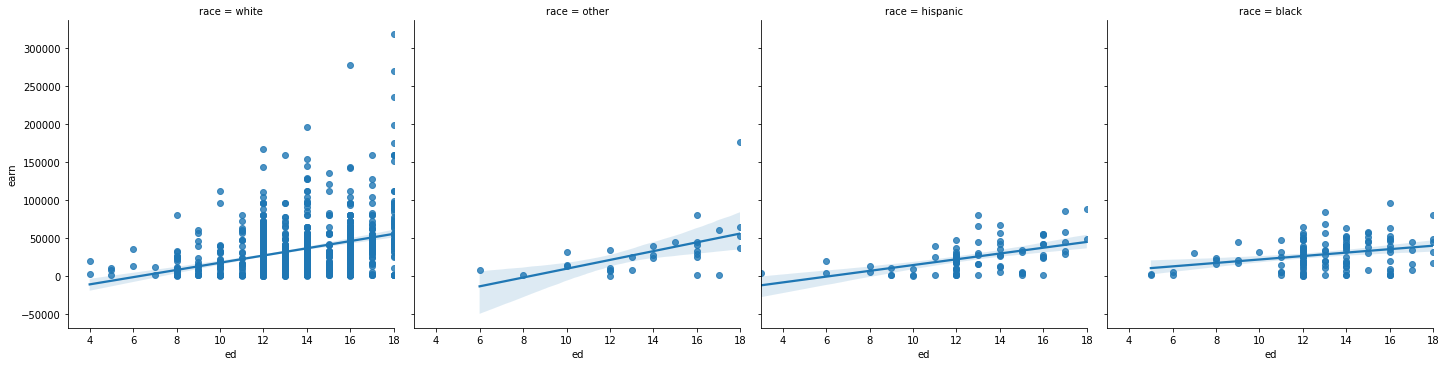

In [128]:
corr_ed_and_race = pd.read_sql('SELECT ed, earn, race FROM wages_table', conn)
sns.lmplot(data=corr_ed_and_race, x='ed', y='earn', col='race')

Correlation between Education and Earnings based on Race and Sex

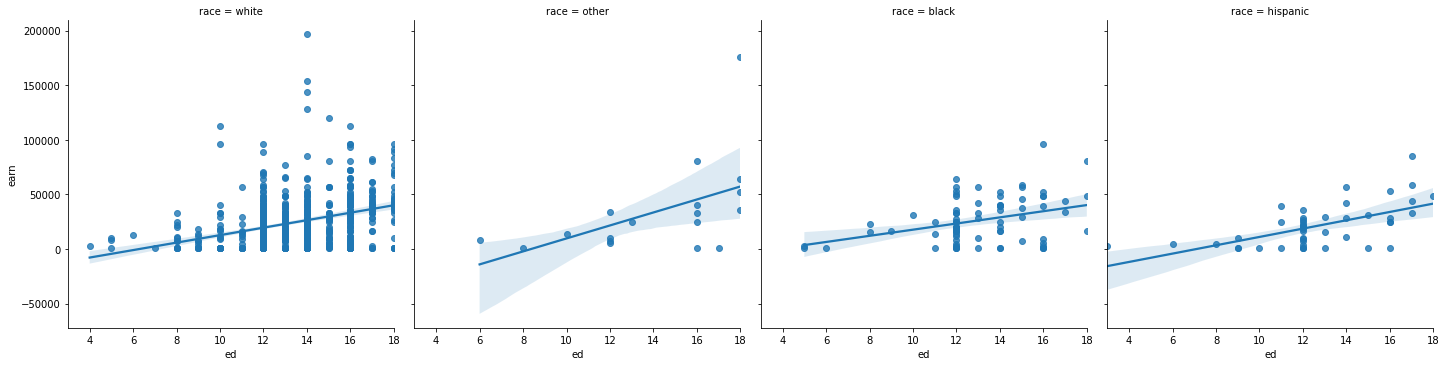

In [151]:
db = pd.read_sql('SELECT sex, ed, earn, race FROM wages_table WHERE sex = "female"', conn)
sns.lmplot(data=db, x='ed', y='earn', col='race')

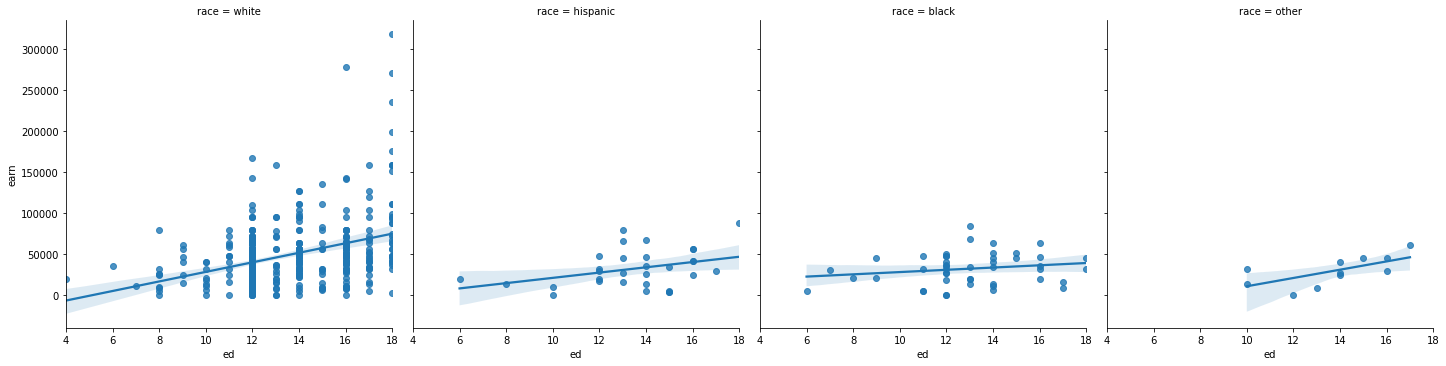

In [162]:
db = pd.read_sql('SELECT sex, ed, earn, race FROM wages_table WHERE sex = "male"', conn)
sns.lmplot(data=db, x='ed', y='earn', col='race')

Density of Earning based on Sex

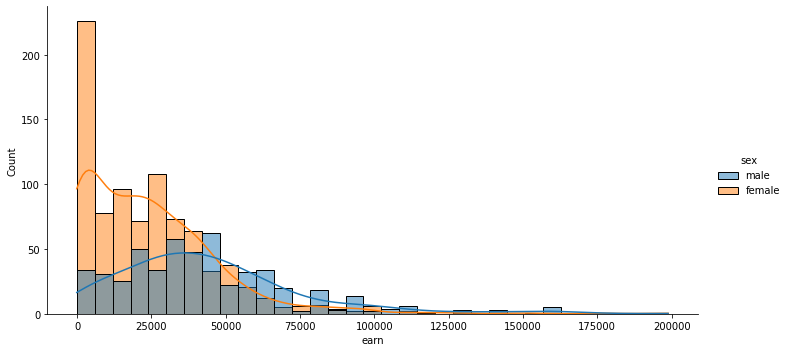

In [166]:
db = pd.read_sql('SELECT sex, earn FROM wages_table WHERE earn < 200000', conn)
sns.displot(data=db, x='earn', hue='sex', kind='hist', kde=True, aspect=2)

Density of Earnings based on Race

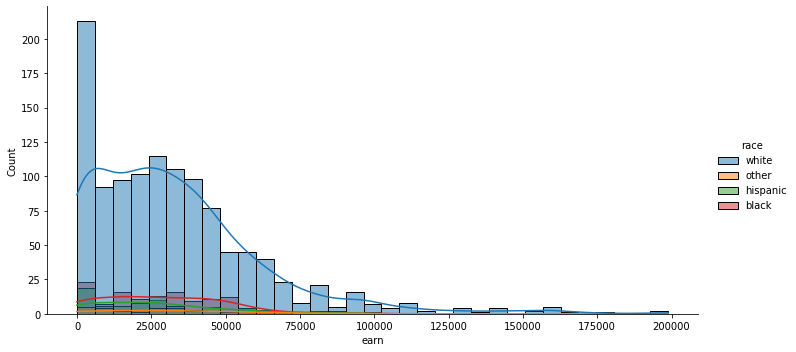

In [178]:
db = pd.read_sql('SELECT earn, race FROM wages_table WHERE earn < 200000', conn)
sns.displot(data=db, x='earn', hue='race', kind='hist', kde=True, aspect=2)

Density of male Earnings based on Race

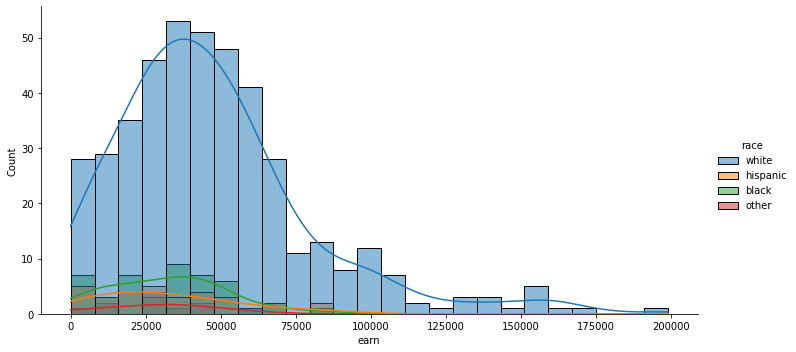

In [179]:
db = pd.read_sql('SELECT earn, race FROM wages_table WHERE earn < 200000 AND sex = "male"', conn)
sns.displot(data=db, x='earn', hue='race', kind='hist', kde=True, aspect=2)

Density of female Earnings based on Race

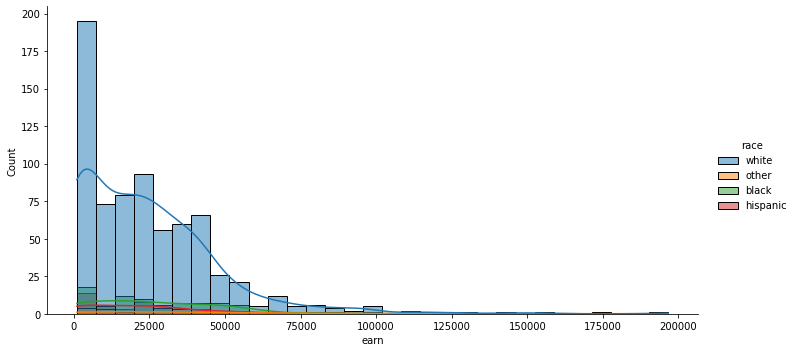

In [180]:
db = pd.read_sql('SELECT earn, race FROM wages_table WHERE earn < 200000 AND sex = "female"', conn)
sns.displot(data=db, x='earn', hue='race', kind='hist', kde=True, aspect=2)

Density of male Earnings based on Race (Not-White)

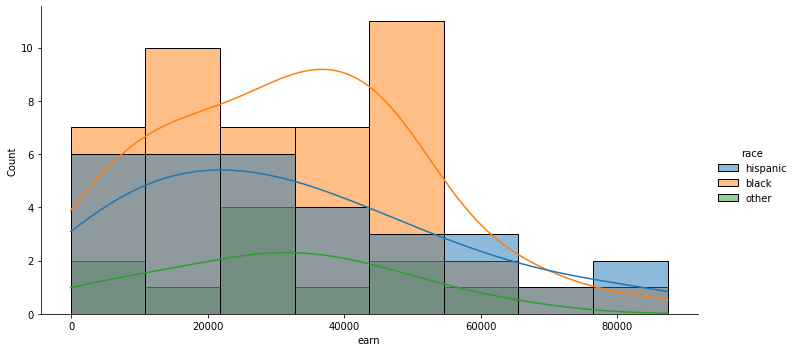

In [183]:
db = pd.read_sql('SELECT earn, race FROM wages_table WHERE earn < 200000 AND sex = "male" AND race IS NOT "white"', conn)
sns.displot(data=db, x='earn', hue='race', kind='hist', kde=True, aspect=2)

Density of female Earnings based on Race (Not-White)

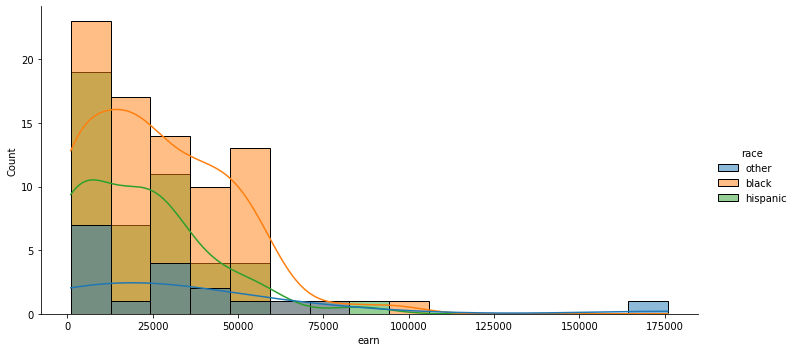

In [184]:
db = pd.read_sql('SELECT earn, race FROM wages_table WHERE earn < 200000 AND sex = "female" AND race IS NOT "white"', conn)
sns.displot(data=db, x='earn', hue='race', kind='hist', kde=True, aspect=2)

Density of Earnings based on Age (25 - 30)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you 

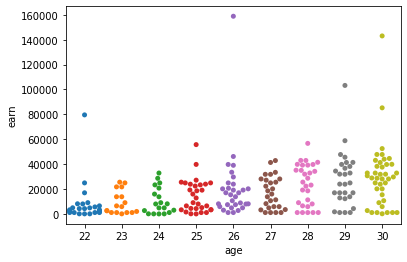

In [176]:
db = pd.read_sql('SELECT earn, age FROM wages_table WHERE age BETWEEN 20 AND 30', conn)
sns.swarmplot(data=db, y='earn', x='age')

Close SQLite connection

In [185]:
conn.close()